In [1]:
import pandas as pd

In [22]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
pd.options.display.max_rows
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
#Checking null values in dataframe
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

#No null values found then we can proceed

#in the dataset the target is to predict the salary

In [8]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [9]:
#To check any widespaces present in target column
df.loc[df["salary"]== " "]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [10]:
#no widespaces found

categorical data-
#rank, discipline, set
& continious data-
#yrs.since.phd, yrs.service, salary

In [23]:
#Making data frame for categorical data
df_categorical=df[["rank", "discipline", "sex"]].copy()
df_categorical

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [24]:
df_categorical.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

#visualization of data

In [13]:
import seaborn as sns

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


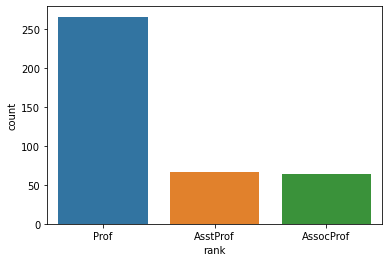

In [25]:
sns.countplot(x="rank", data=df)
print(df_categorical["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


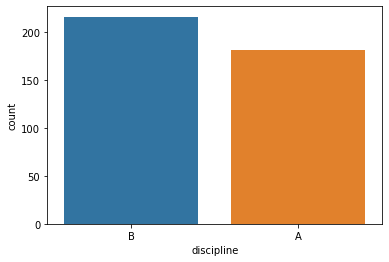

In [15]:
sns.countplot(x="discipline", data=df)
print(df_categorical["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


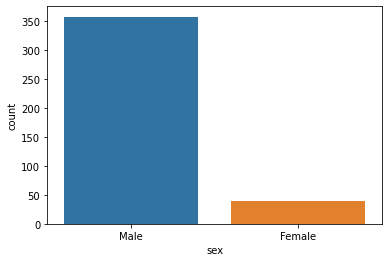

In [16]:
sns.countplot(x="sex", data=df)
print(df_categorical["sex"].value_counts())

In [17]:
df_continuousdata=df[["yrs.since.phd", "yrs.service", "salary"]].copy()


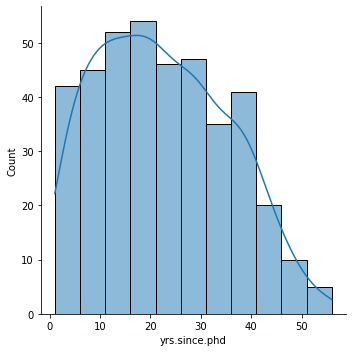

In [18]:
sns.displot(df_continuousdata["yrs.since.phd"], kde=True)

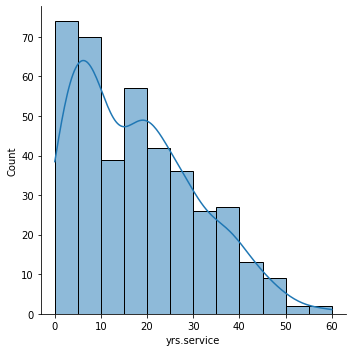

In [19]:
sns.displot(df_continuousdata["yrs.service"], kde=True)

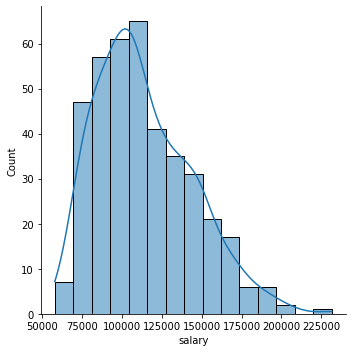

In [20]:
sns.displot(df_continuousdata["salary"], kde=True)

In [21]:
The dataset has a string values. we will use the encoding techniques to convert string dara to numerical one

SyntaxError: invalid syntax (1489530661.py, line 1)

In [ ]:
df

In [26]:
Obj_df=df.select_dtypes(include=['object'])
Obj_df

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


Encoding of DataFrame:

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()


In [28]:
for string in df.columns:
    if df[string].dtypes=="object":
        df[string]=enc.fit_transform(df[string].values.reshape(-1,1))


In [29]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [30]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

In [ ]:
#Describe the dataset
df.describe()


In [ ]:
#no of columns are very low so no need to perform heatmap

correlation of columns eith target variable:

In [32]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [31]:
df.corr()["salary"].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

#sex column has a least corelation with target column

<AxesSubplot:>

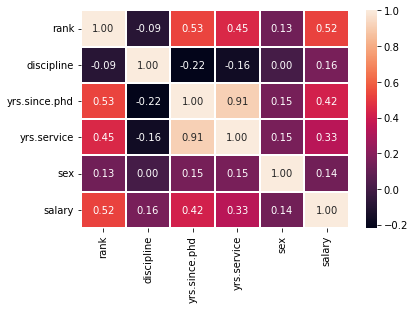

In [33]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="white",fmt="0.2f")

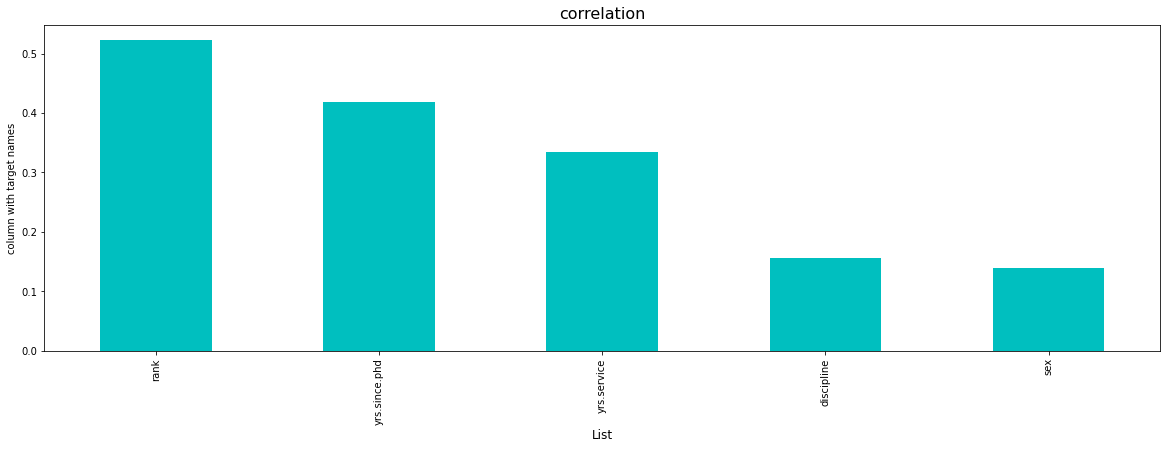

In [34]:
#Check the corelation using plots
plt.figure(figsize=(20,6))
df.corr()["salary"].sort_values(ascending=False).drop(["salary"]).plot(kind="bar",color="c")
plt.xlabel("List", fontsize=12)
plt.ylabel("column with target names", fontsize=10)
plt.title("correlation",fontsize=16)
plt.show()

In [35]:
#checking the skewness
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [36]:
df.skew().sort_values(ascending=True)

sex             -2.709958
rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

+/-0.5 is the range for skewness

#skewness is present in sex, rank, yrs.service and salary column

salary-Target variable

rank-categorical

sex-categorical

yrs.service-continious

#we won't calculate skewness for categorical data because mean and std willnot be calculated for categorical data

#skewness is present in yrs.service column but it will be in betwwen 0.5 to 1, Value between 0.5 and 1 or -0.5 and -1 is moderately skewed, so it will be ignored



Checking the Outliers:

In [37]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

In [ ]:
 #boxplot completely works on principle of quartiles and also the box plot on categorical data is not logical to do, so we go for continious data

<AxesSubplot:>

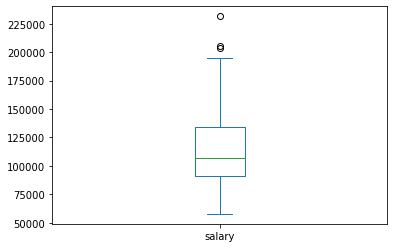

In [38]:
df["salary"].plot.box()

<AxesSubplot:>

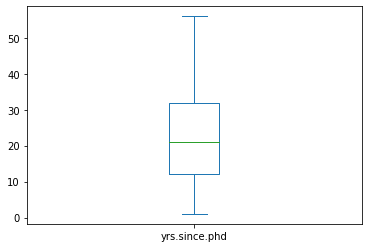

In [39]:
df["yrs.since.phd"].plot.box()

<AxesSubplot:>

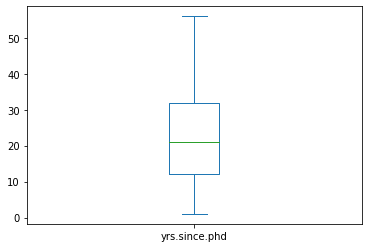

In [40]:
df["yrs.since.phd"].plot.box()

In [41]:
df["salary"].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      



Outlier Removal:

In [42]:
df.shape

(397, 6)

In [43]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [44]:
df["sex"].unique()

array([1., 0.])

outliers are found at 4th column and it is a categorical data, we cannot apply outlier removal on categorical feature

Seperating the columns into features and target:
    

In [49]:
features=df.drop("salary",axis=1)
features

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [50]:
target=df["salary"]
target

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

#Scaling the data

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [52]:
import warnings
warnings.filterwarnings("ignore")


In [53]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is: {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is: 0.3611999954853077
At random state 0, the testing accuracy is: 0.4079258314975236


At random state 1, the training accuracy is: 0.3604245854198438
At random state 1, the testing accuracy is: 0.41633641876629457


At random state 2, the training accuracy is: 0.37547390964955596
At random state 2, the testing accuracy is: 0.3600189554526694


At random state 3, the training accuracy is: 0.3847313825130595
At random state 3, the testing accuracy is: 0.3293529875010861


At random state 4, the training accuracy is: 0.38517450334380465
At random state 4, the testing accuracy is: 0.304400813331562


At random state 5, the training accuracy is: 0.3950033630150771
At random state 5, the testing accuracy is: 0.2752907752774737


At random state 6, the training accuracy is: 0.3650308031752799
At random state 6, the testing accuracy is: 0.40189870806075667


At random state 7, the training accuracy is: 0.3575963886324032
At random state 7, the testing

In [62]:
features_train, features_test, target_train, target_test=train_test_split(features,target,test_size=0.2,random_state=52)

In [63]:
#train the model
lr.fit(features_train,target_train)

LinearRegression()

In [68]:
pred_test=lr.predict(features_test)

In [65]:
print(r2_score(target_test,pred_test))

0.3682296312128154


cross validation of model

In [67]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")
          

At cross fold 2 the cv score is 0.3270801167406512 and accuracy score for training is -0.39755881262412696 and accuracy for the testing is 0.3682296312128154


At cross fold 3 the cv score is 0.3203328673059879 and accuracy score for training is -0.39755881262412696 and accuracy for the testing is 0.3682296312128154


At cross fold 4 the cv score is 0.3218196693768362 and accuracy score for training is -0.39755881262412696 and accuracy for the testing is 0.3682296312128154


At cross fold 5 the cv score is 0.29569928663871775 and accuracy score for training is -0.39755881262412696 and accuracy for the testing is 0.3682296312128154


At cross fold 6 the cv score is 0.33096341839295546 and accuracy score for training is -0.39755881262412696 and accuracy for the testing is 0.3682296312128154


At cross fold 7 the cv score is 0.3257704419996536 and accuracy score for training is -0.39755881262412696 and accuracy for the testing is 0.3682296312128154


At cross fold 8 the cv score is 0.3310

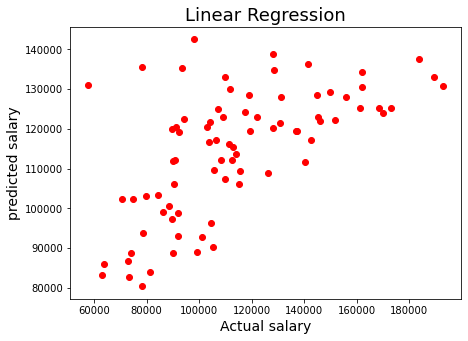

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(x=target_test,y=pred_test, color="r")
plt.xlabel("Actual salary", fontsize=14)
plt.ylabel("predicted salary", fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.savefig("lr.png")
plt.show()

Regularization

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [71]:
from sklearn.linear_model import Lasso
parameters= {"alpha":[.0001, .001, .01, -1, 1, 10], "random_state":list(range(0,10))}
ls= Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)


{'alpha': 10, 'random_state': 0}


In [72]:
#final model training
ls=Lasso(alpha=10,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

36.90422719427353

In [73]:
pred_ls= ls.predict(features_test)

In [74]:
lss=r2_score(target_test,pred_ls)
lss*100

36.772084379567005

In [75]:
cv_score=cross_val_score(ls,features,target,cv=8)
cv_mean=cv_score.mean()
cv_mean*100

33.102864358290255

Ensemble technique:

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={"criterion" : ["mse", "mae"],
           "max_features":["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf, parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [77]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision =rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print("R2 Score :", rfs*100)

rfscore= cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("cross val score:" ,rfc*100)
      
      

R2 Score : 32.228057951128505
cross val score: 26.36364477190106


In [78]:
import pickle
filename= "salary.pkl"
pickle.dump(rf, open(filename, "wb"))

Conclusion:
    

In [79]:
loaded_model=pickle.load(open("salary.pkl", "rb"))
result=loaded_model.score(features_test, target_test)
print(result*100)

32.228057951128505


In [80]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=["predicted","original"])

In [81]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
predicted,104862.43,121778.185,130100.935,78064.14,139929.305,81021.98,128654.82,133499.35,68853.78,139140.535,...,123591.06,114841.22,86009.12,127253.31,118676.85,110111.58,87249.7,110565.42,132031.605,77643.51
original,104862.43,121778.185,130100.935,78064.14,139929.305,81021.98,128654.82,133499.35,68853.78,139140.535,...,123591.06,114841.22,86009.12,127253.31,118676.85,110111.58,87249.7,110565.42,132031.605,77643.51
